<a href="https://colab.research.google.com/github/Bannore-Aaditya/Bannore-Aaditya/blob/main/RecommendationSimilar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q keras

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

In [ ]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [ ]:
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [ ]:
filenames = []

for file in os.listdir('/content/drive/MyDrive/Memetube/memes'):
    filenames.append(os.path.join('/content/drive/MyDrive/Memetube/memes
    ',file))

feature_list = []

for file in tqdm(filenames):
    feature_list.append(extract_features(file,model))

pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))

100%|██████████| 60/60 [00:45<00:00,  1.33it/s]


In [ ]:
import pickle
import tensorflow
import numpy as np
from numpy.linalg import norm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
import cv2

In [ ]:
feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [ ]:
img = image.load_img('/content/drive/MyDrive/Memetube/memes/meme59.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

[[36 19  0 22 21  5]]


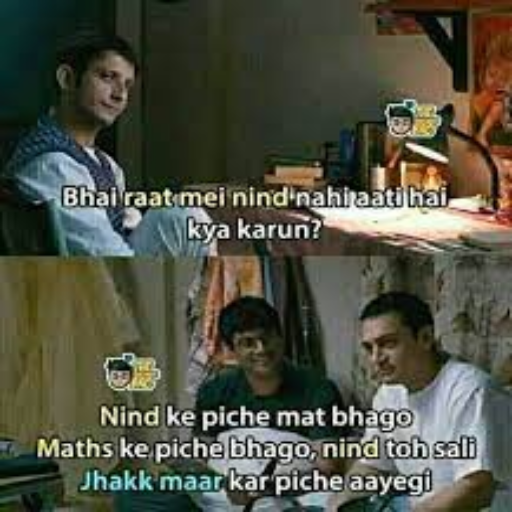

next meme will be shown from here


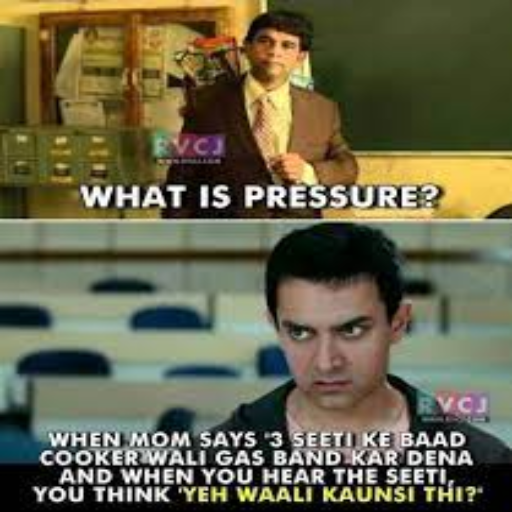

next meme will be shown from here


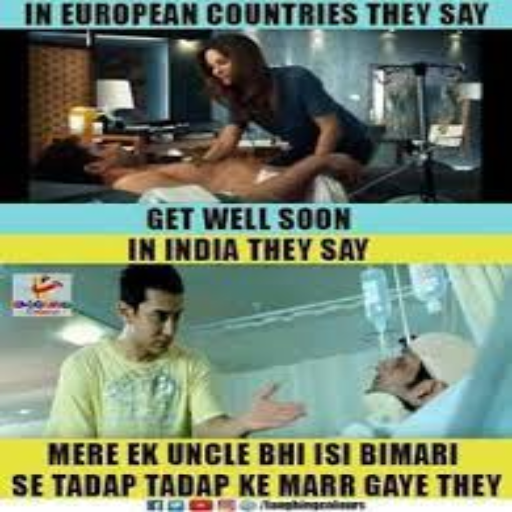

next meme will be shown from here


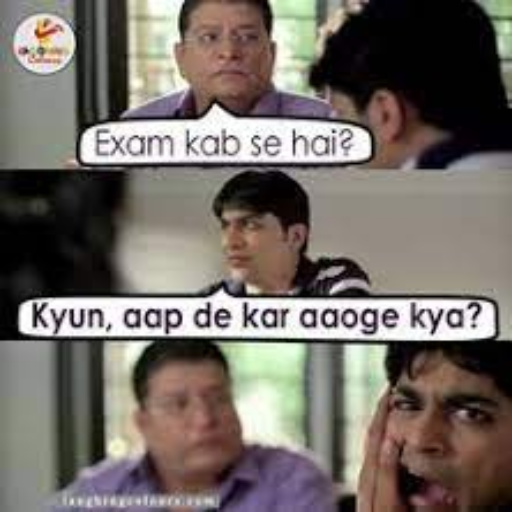

next meme will be shown from here


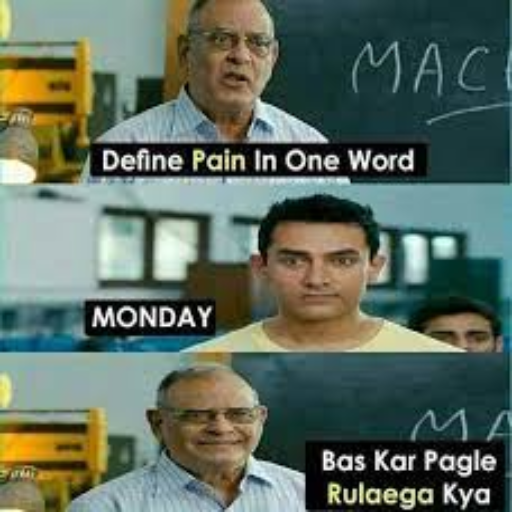

next meme will be shown from here


In [ ]:
from google.colab.patches import cv2_imshow

neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([normalized_result])

print(indices)

for file in indices[0][1:6]:
    temp_img = cv2.imread(filenames[file])
    temp2 = cv2.resize(temp_img,(512,512))
    cv2_imshow(temp2)
    print("next meme will be shown from here")
    cv2.waitKey(100)
